# Tensorflow Mnist (CNN)
It used to follow a tutorial I found at [Tensorflow](https://www.tensorflow.org/overview)

Also a bit of [CNN Tutorial](https://www.tensorflow.org/tutorials/images/cnn)

This is mostly for me to get to know tensorflow

### Setup

In [ ]:
# update tensorflow
!pip install --upgrade -q tensorflow

# get tensorflow
import tensorflow as tf
print(f"\nTensorflow Version: {tf.__version__}")

# get pyplot
import matplotlib.pyplot as plt

# readability of tensors (usually on by default in TF2)
# tf.enable_eager_execution()


Tensorflow Version: 2.4.0


### Dataset Preperation

In order to create a NN the given data should be converted properly.

It should be divided into an input data and a target data, it may make sense to also set up an evaluation set in order to find out how the model behaves on data it hasn't been given.

In [ ]:
# obtain mnist data-set
mnist = tf.keras.datasets.mnist

# devide data into different variables
# depends on how the data is given
(training_image, training_label), (testing_image, testing_label) = mnist.load_data()

# converting data
#     this data is given in int and in [0, 256]
#     therefore shoud be mapped to float [0, 1]
training_image = training_image.reshape(60000, 28, 28, 1).astype('float32') / 255.0
testing_image = testing_image.reshape(10000, 28, 28, 1).astype('float32') / 255.0

11493376/11490434 [==============================] - 0s 0us/step


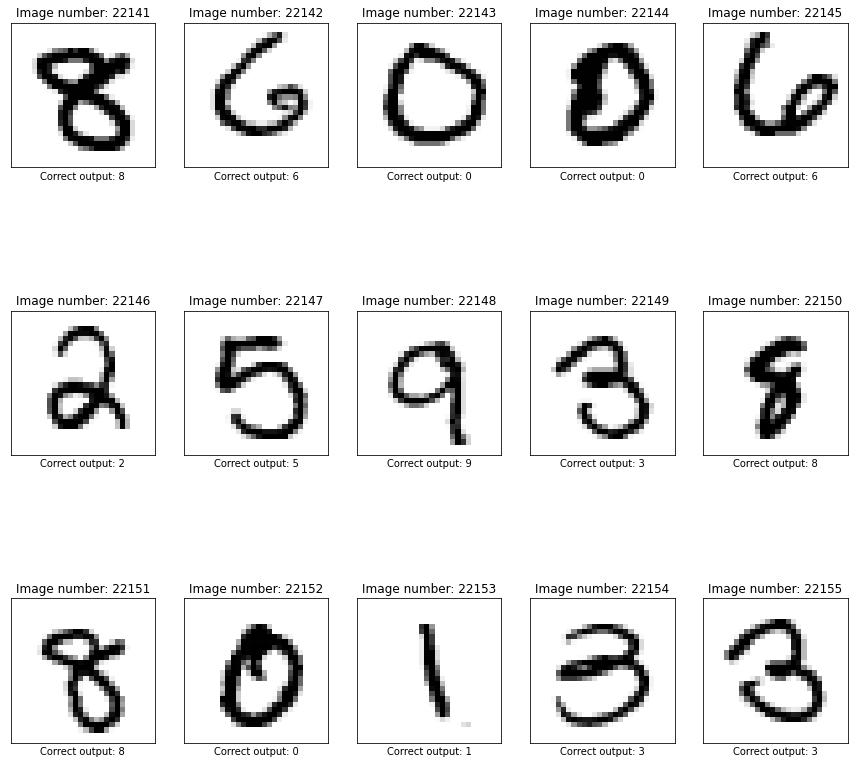

In [ ]:
# Display a set of 15 images from set

import random
r = random.randint(0, len(training_image) - 15)

plt.figure(figsize=(15,15))
for i in range(15):
  plt.subplot(3, 5, i+1)
  plt.xticks([]) # removing numbers under image
  plt.yticks([]) # removing numbers next to image
  plt.imshow(training_image[i + r].reshape(28,28), cmap=plt.cm.binary) # channel number has to be gotten rid of again
  plt.xlabel(f'Correct output: {training_label[i + r]}')
  plt.title(f'Image number: {i + r}')
plt.show()

### Setting up Model

To set up the Model it has to be given layers, which include:
- Flatten
    - Transforming multi-dimensonal data into 1-dimensional data
- Dense
    - Normal fully (densly) connected Layer of Neurons
- Dropout
    - Prevents Overfitting by randomly not using Neurons therefore making NN not 100% dependend on it
    - Only used while training, when being used to evaluate every Neuron is used
- Look up other layers here: https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [ ]:
# setup of a model with 4 layers as mentioned above (2 dense layers)
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(28, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
flatten (Flatten)            (None, 18928)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1211456   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 1,212,386
Trainable params: 1,212,386
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

To compile the model it must be given an optimizer and a loss function
- optimizer
  - Look up optimizers here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers 
- loss function
  - Function with signature: scalar_loss = fn(y_true, y_pred)
  - Look up loss functions here: https://www.tensorflow.org/api_docs/python/tf/keras/losses

In [ ]:
# defining the loss function
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

# compiling a model
model.compile(optimizer = 'adam',
              loss = loss_function,
              metrics = ['accuracy'])

### Training the Model

To train the Model it must be given an input set as well as a target set.

With the epochs argument you can define how many times the model should be trained on the given set

In [ ]:
history = model.fit(training_image, training_label, epochs = 15, validation_data=(testing_image, testing_label))

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3552 - accuracy: 0.8930 - val_loss: 0.0638 - val_accuracy: 0.9795
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0553 - val_accuracy: 0.9821
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0499 - accuracy: 0.9839 - val_loss: 0.0547 - val_accuracy: 0.9827
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0568 - val_accuracy: 0.9824
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0260 - accuracy: 0.9911 - val_loss: 0.0488 - val_accuracy: 0.9864
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0602 - val_accuracy: 0.9837
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0186 - accuracy: 0.9943 - val_loss: 0.0624 - val_ac

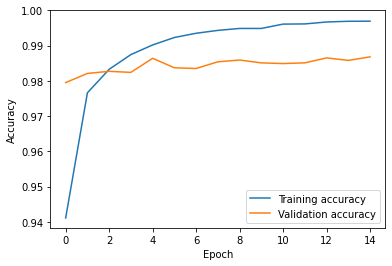

In [ ]:
# Showing how model improves over the epochs
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(None, 1)
plt.legend(loc='best')
plt.show()

### Evaluation of Model

When evaluating a model it prints the time consumption, loss and whatever metric was given during compilation of the model on a testing set, again devided into an input set and a evaluation set.

In [ ]:
model.evaluate(testing_image, testing_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9868


[0.06882940977811813, 0.9868000149726868]

### Predicting

Usually the model returns a vector of "logits" (non-normalized probabilites), which is easily transformed to normalized probability, by using a softmax function on the logit.

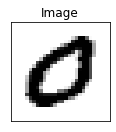

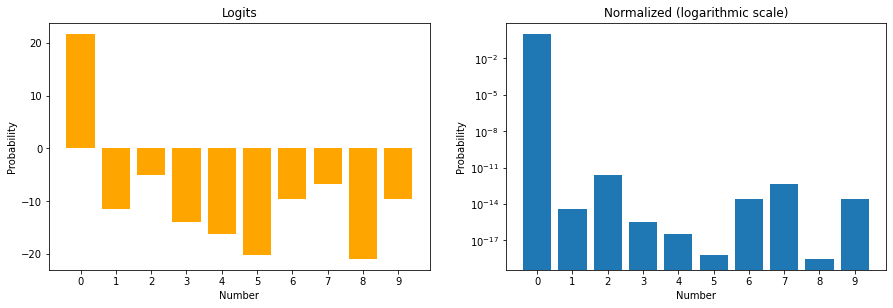

chosen from testing set number: 6286


In [ ]:
number = random.randint(0,10000)

# show image
plt.subplot(2, 2, 1)
plt.imshow(testing_image[number].reshape(28,28), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Image")

# options for charts
plt.figure(figsize=(15, 10))

# show prediction in Logits
plt.subplot(2,2,3)
plt.bar(range(10), height = model.predict((testing_image[number:number+1]))[0], color='orange')
plt.xticks(range(10))
plt.xlabel("Number")
plt.ylabel("Probability")
plt.title("Logits")

#show prediction in probability
plt.subplot(2, 2, 4)
plt.yscale("log")
plt.bar(range(10), height=tf.nn.softmax(model.predict((testing_image[number:number+1])))[0])
plt.xticks(range(10))
plt.xlabel("Number")
plt.ylabel("Probability")
plt.title("Normalized (logarithmic scale)")

plt.show()
print(f'chosen from testing set number: {number}') #4193